# George Russell

<img src="https://www.formula1.com/content/fom-website/en/drivers/george-russell/_jcr_content/image.img.1920.medium.jpg/1646750994602.jpg" width="300">

### Team: Mercedes

<img src ="https://www.formula1.com/content/fom-website/en/drivers/george-russell/_jcr_content/helmet.img.png/1646824823304.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

rus_laps <- lap_data %>%
            filter(driverId == 847)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1011,56
1045,56
1052,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5898456,98.3076,1.63846


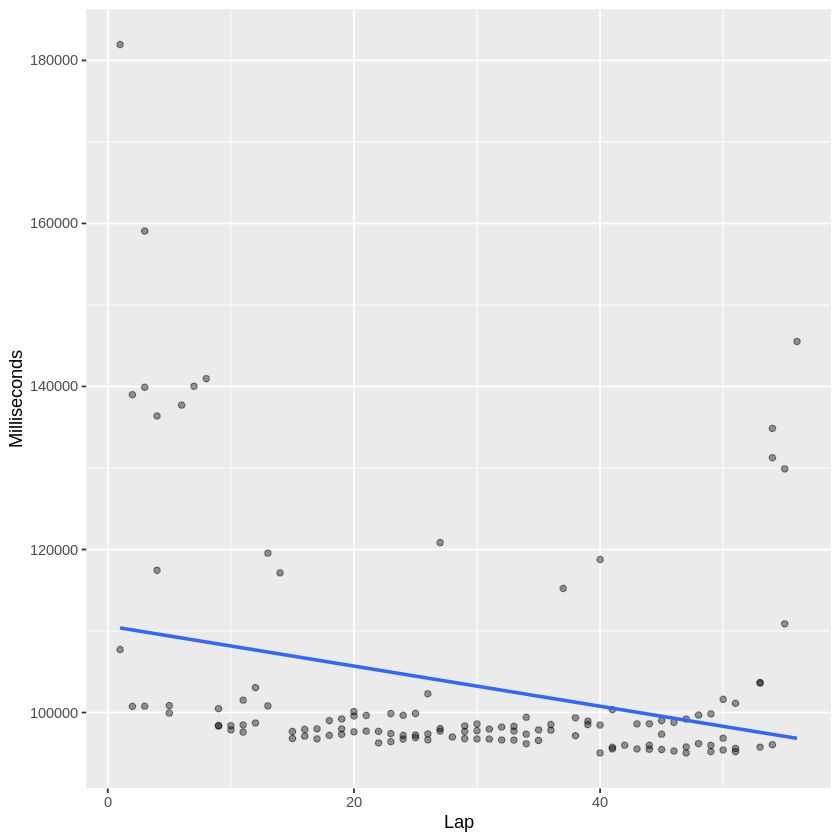

In [4]:
#1. BAHRAIN 

gr_bahrain <- rus_laps %>%
                filter(raceId %in% bahrain_race_ID) 

gr_bahrain_clean <- gr_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
gr_bahrain_clean
gr_bahrain_clean_ID <- gr_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_bahrain_races <- rus_laps %>%
                    filter(raceId %in% gr_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

In [5]:
# #2. Saudi Arabia

# gr_saudi <- rus_laps %>%
#                 filter(raceId %in% saudi_race_ID) 

# gr_saudi_clean <- gr_saudi %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# gr_saudi_clean
# gr_saudi_clean_ID <- gr_saudi_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# gr_saudi_races <- rus_laps %>%
#                     filter(raceId %in% gr_saudi_clean_ID)

# formulaone_split <- initial_split(gr_saudi_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5336430,88.94051,1.482342


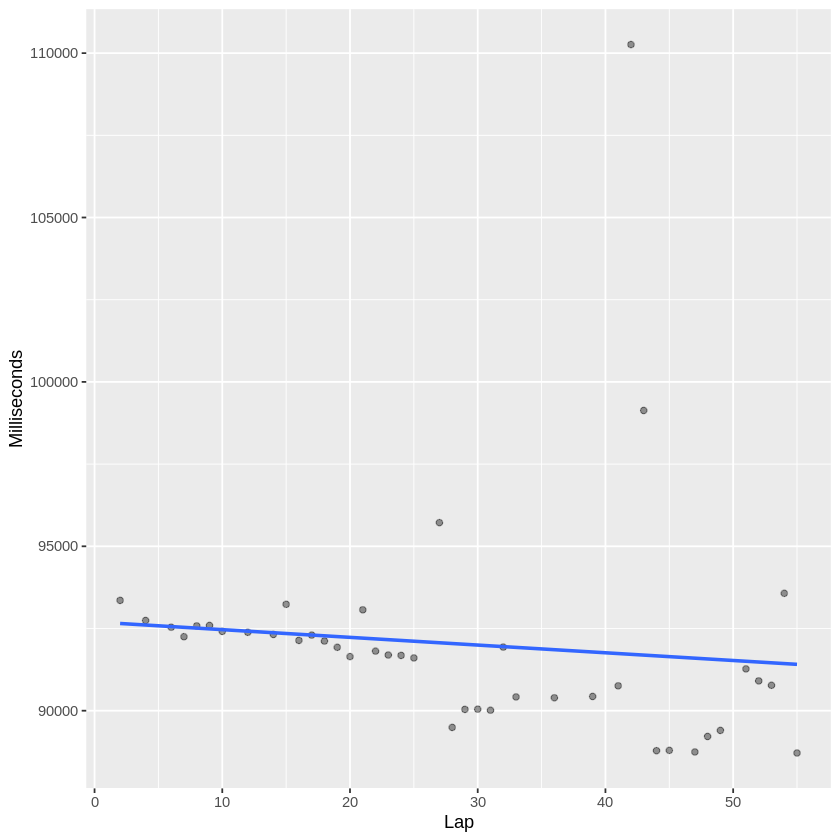

In [6]:
#3. Australia

gr_aus <- rus_laps %>%
                filter(raceId %in% aus_race_ID) 

gr_aus_clean <- gr_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_aus_clean
gr_aus_clean_ID <- gr_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_aus_races <- rus_laps %>%
                    filter(raceId %in% gr_aus_clean_ID)

formulaone_split <- initial_split(gr_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,51
1053,30


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5316562,88.60936,1.476823


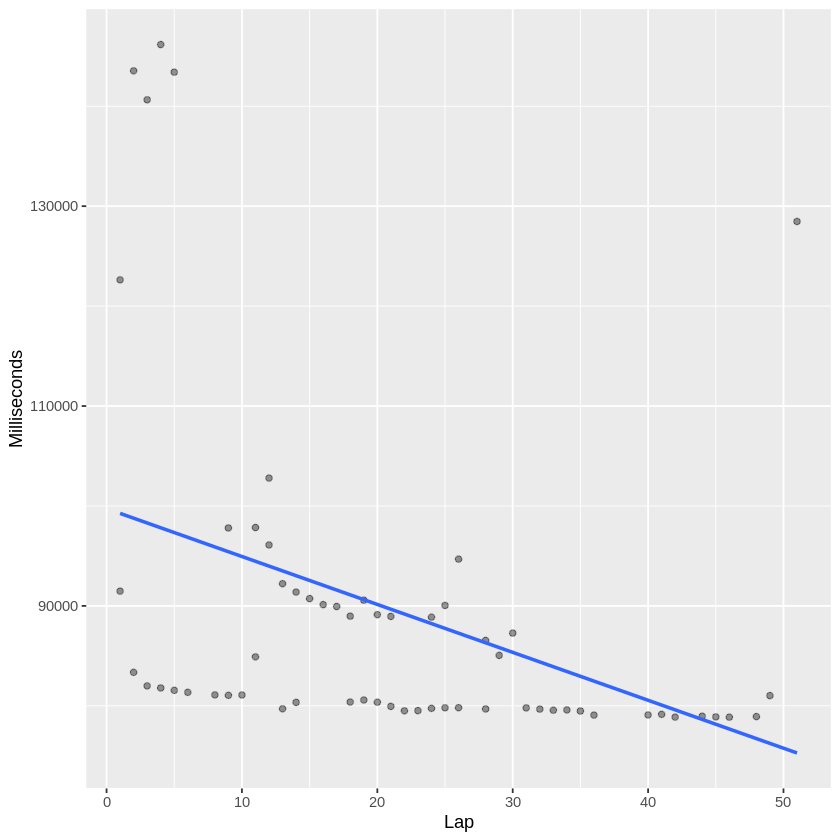

In [7]:
#4. Italy, Imola

gr_imola <- rus_laps %>%
                filter(raceId %in% imola_race_ID) 

gr_imola_clean <- gr_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_imola_clean
gr_imola_clean_ID <- gr_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_imola_races <- rus_laps %>%
                    filter(raceId %in% gr_imola_clean_ID)

formulaone_split <- initial_split(gr_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,57
1067,57


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5893507,98.22512,1.637085


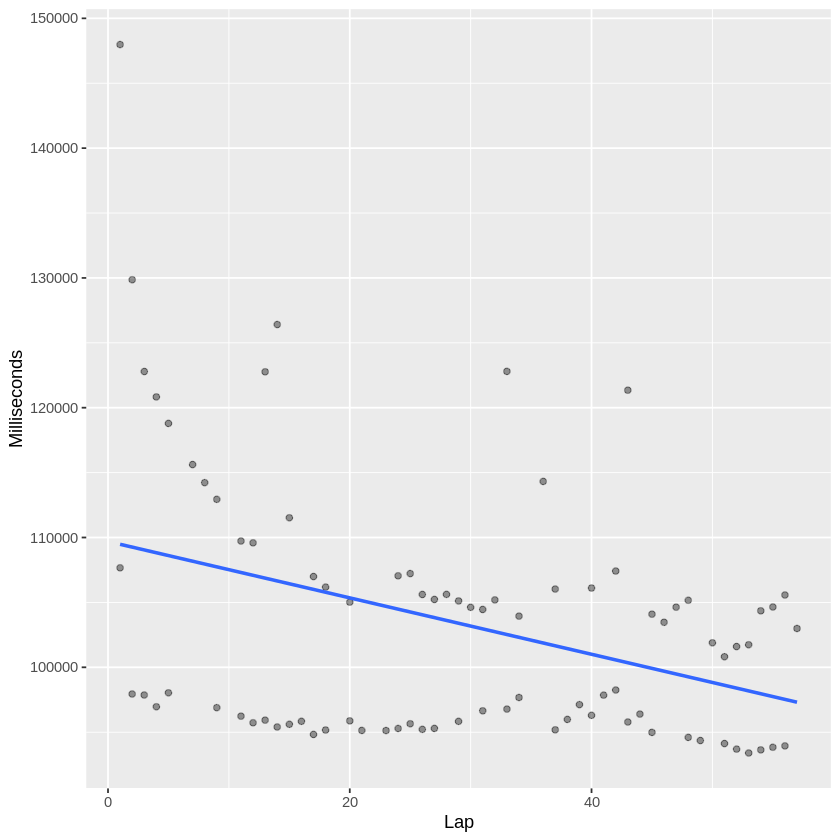

In [8]:
#5. Turkey (Replacing Miami)

gr_turkey <- rus_laps %>%
                filter(raceId %in% turkey_race_ID) 

gr_turkey_clean <- gr_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_turkey_clean
gr_turkey_clean_ID <- gr_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_turkey_races <- rus_laps %>%
                    filter(raceId %in% gr_turkey_clean_ID)

formulaone_split <- initial_split(gr_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,65
1036,65
1055,65


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5789354,96.48923,1.608154


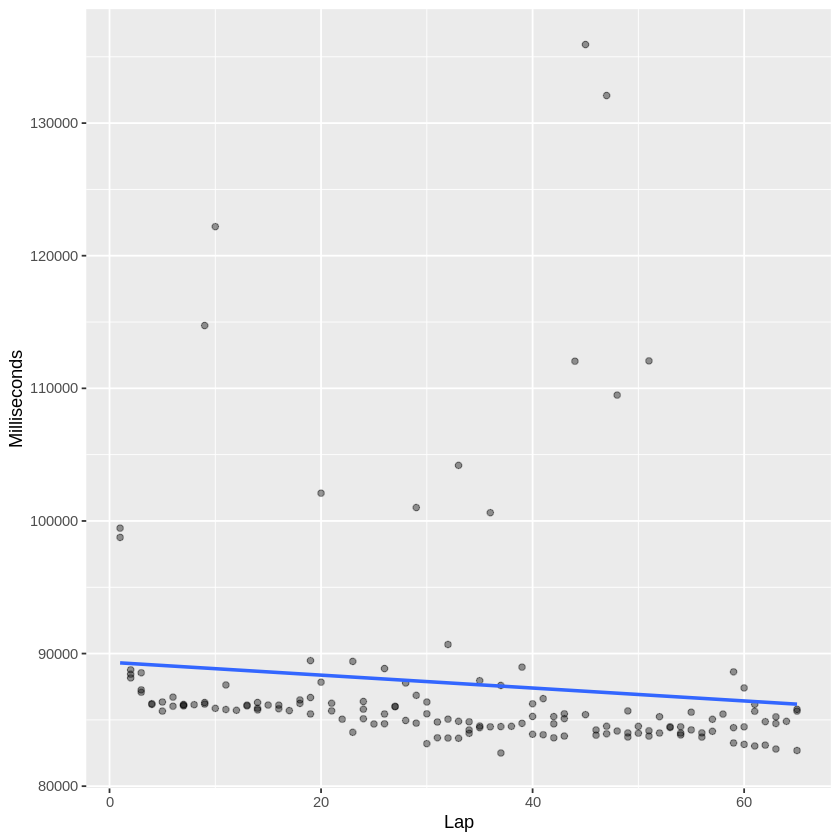

In [9]:
#6. Spain

gr_spain <- rus_laps %>%
                filter(raceId %in% spain_race_ID) 

gr_spain_clean <- gr_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_spain_clean
gr_spain_clean_ID <- gr_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_spain_races <- rus_laps %>%
                    filter(raceId %in% gr_spain_clean_ID)

formulaone_split <- initial_split(gr_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,77
1056,77


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6235033,103.9172,1.731954


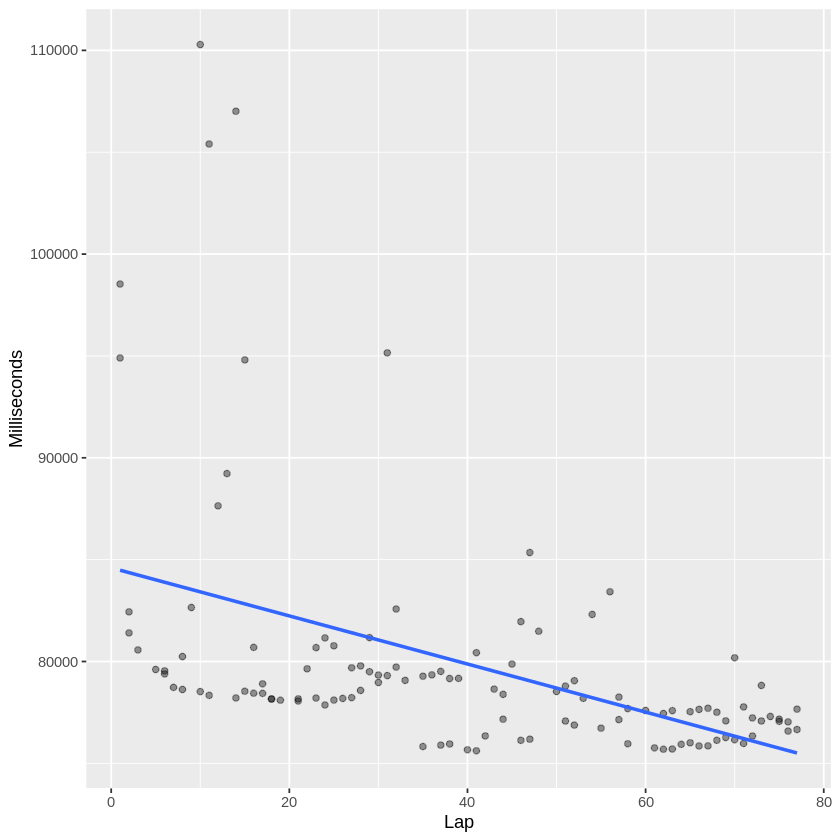

In [10]:
#7.   Monaco

gr_monaco <- rus_laps %>%
                filter(raceId %in% monaco_race_ID) 

gr_monaco_clean <- gr_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_monaco_clean
gr_monaco_clean_ID <- gr_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_monaco_races <- rus_laps %>%
                    filter(raceId %in% gr_monaco_clean_ID)

formulaone_split <- initial_split(gr_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,49
1057,48


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5862043,97.70071,1.628345


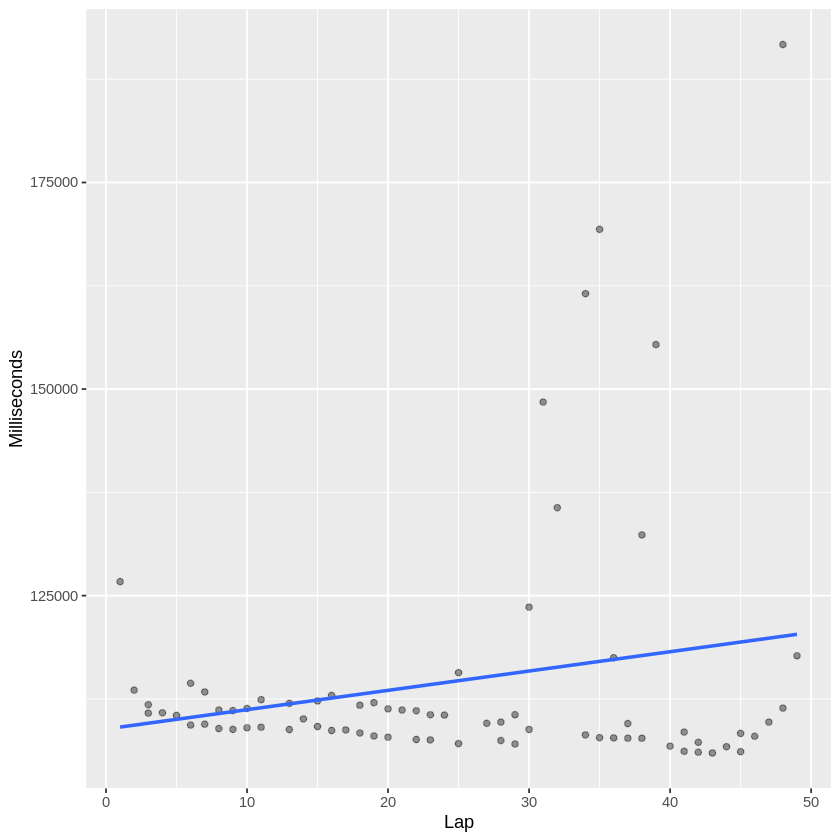

In [11]:
#8.  Azerbaijan

gr_azerbaijan <- rus_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

gr_azerbaijan_clean <- gr_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_azerbaijan_clean
gr_azerbaijan_clean_ID <- gr_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_azerbaijan_races <- rus_laps %>%
                    filter(raceId %in% gr_azerbaijan_clean_ID)

formulaone_split <- initial_split(gr_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,68


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5535444,92.2574,1.537623


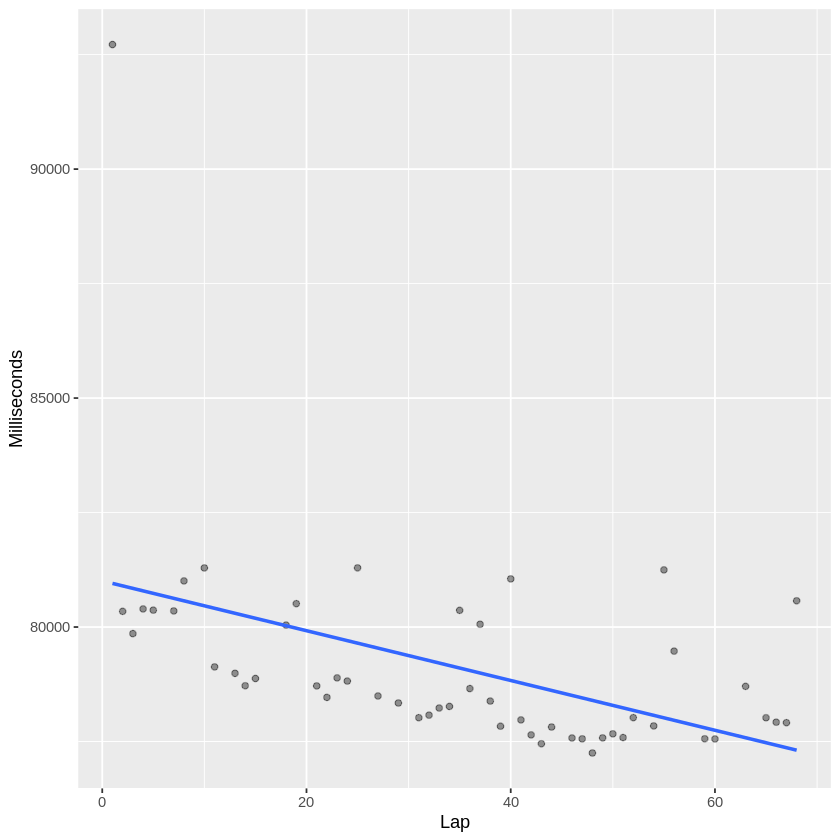

In [12]:
#9.  Canada

gr_canada <- rus_laps %>%
                filter(raceId %in% canada_race_ID) 

gr_canada_clean <- gr_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_canada_clean
gr_canada_clean_ID <- gr_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_canada_races <- rus_laps %>%
                    filter(raceId %in% gr_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5043207,84.05345,1.400891


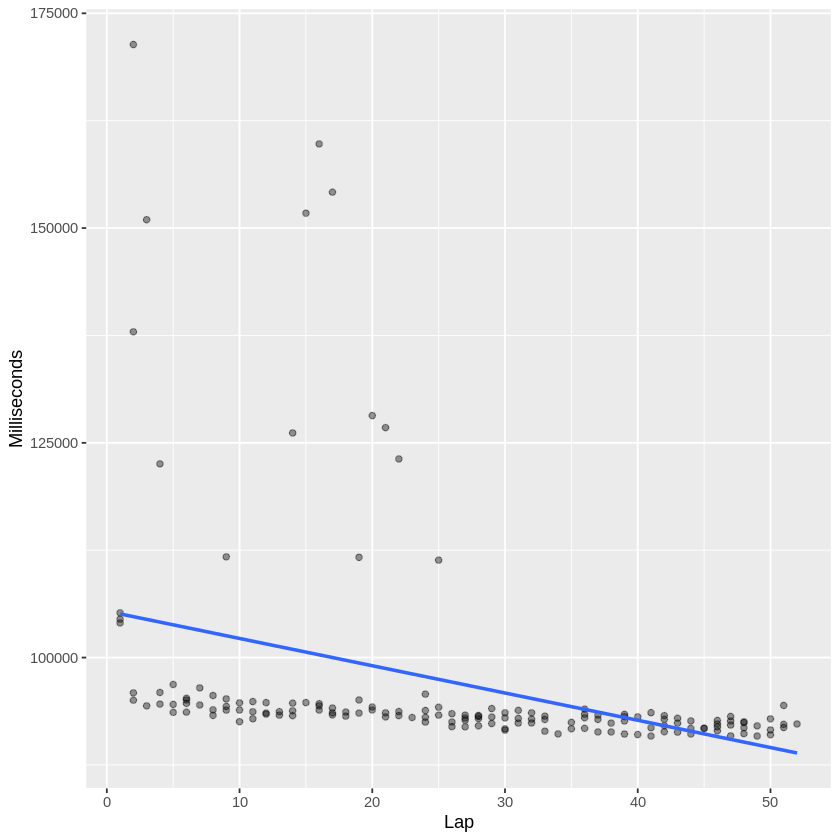

In [13]:
#10.  Great Britain

gr_uk <- rus_laps %>%
                filter(raceId %in% uk_race_ID) 

gr_uk_clean <- gr_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_uk_clean_ID <- gr_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_uk_races <- rus_laps %>%
                    filter(raceId %in% gr_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5092719,84.87866,1.414644


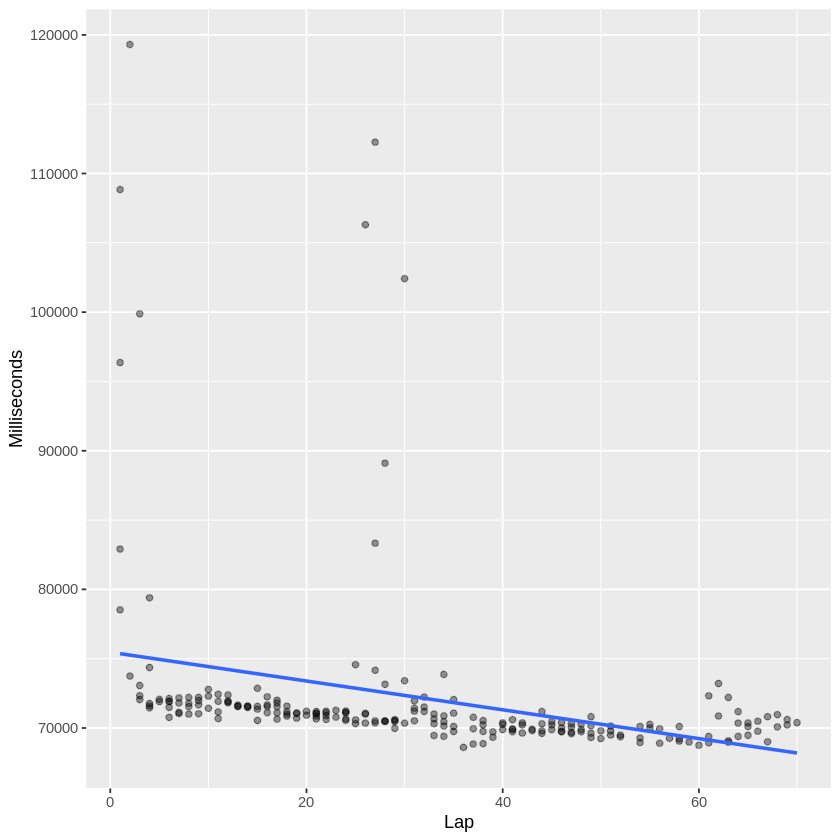

In [14]:
#11.  Austria

gr_austria <- rus_laps %>%
                filter(raceId %in% austria_race_ID) 

gr_austria_clean <- gr_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_austria_clean_ID <- gr_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_austria_races <- rus_laps %>%
                    filter(raceId %in% gr_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
# #12.  France

# gr_france <- rus_laps %>%
#                 filter(raceId %in% france_race_ID) 

# gr_france_clean <- gr_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# gr_france_clean
# gr_france_clean_ID <- gr_france_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# gr_france_races <- rus_laps %>%
#                     filter(raceId %in% gr_france_clean_ID)

# formulaone_split <- initial_split(gr_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5934275,98.90458,1.64841


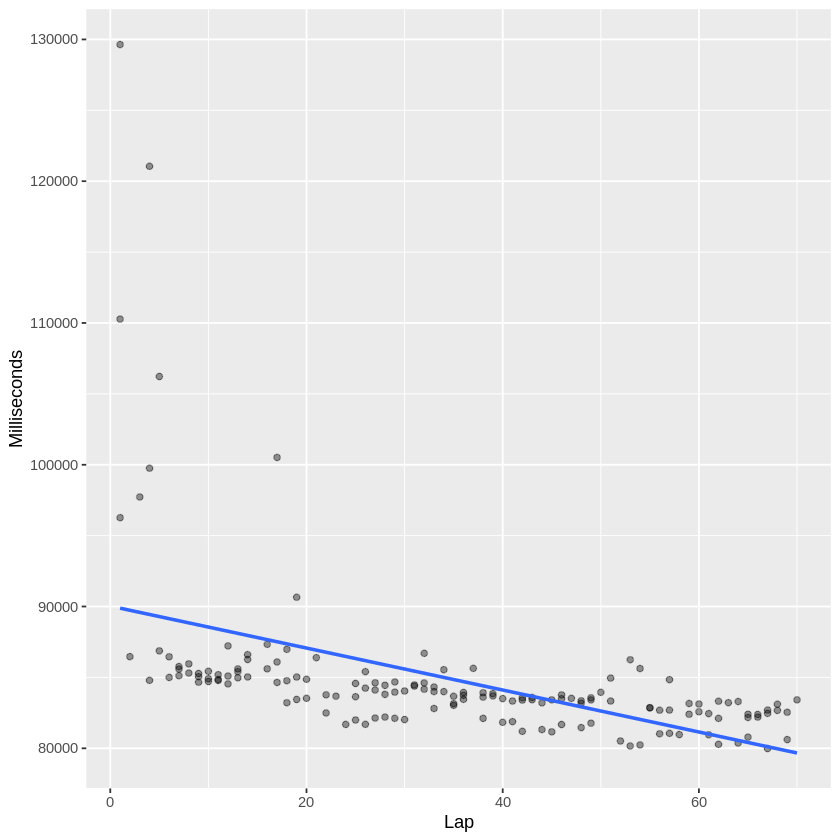

In [16]:
#13.  Hungary

gr_hungary <- rus_laps %>%
                filter(raceId %in% hungary_race_ID) 

gr_hungary_clean <- gr_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

gr_hungary_clean_ID <- gr_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_hungary_races <- rus_laps %>%
                    filter(raceId %in% gr_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(gr_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1022,43
1037,9
1063,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5072242,84.53737,1.408956


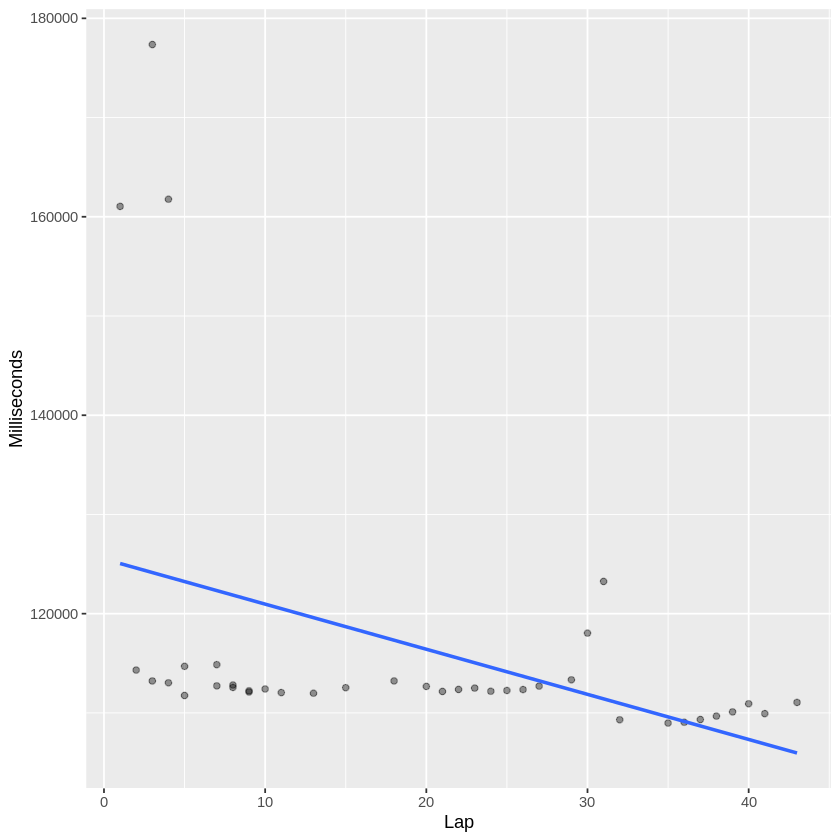

In [17]:
#14. Belgium

gr_belgium <- rus_laps %>%
                filter(raceId %in% belgium_race_ID) 

gr_belgium_clean <- gr_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_belgium_clean
gr_belgium_clean_ID <- gr_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_belgium_races <- rus_laps %>%
                    filter(raceId %in% gr_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(gr_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5579369,92.98948,1.549825


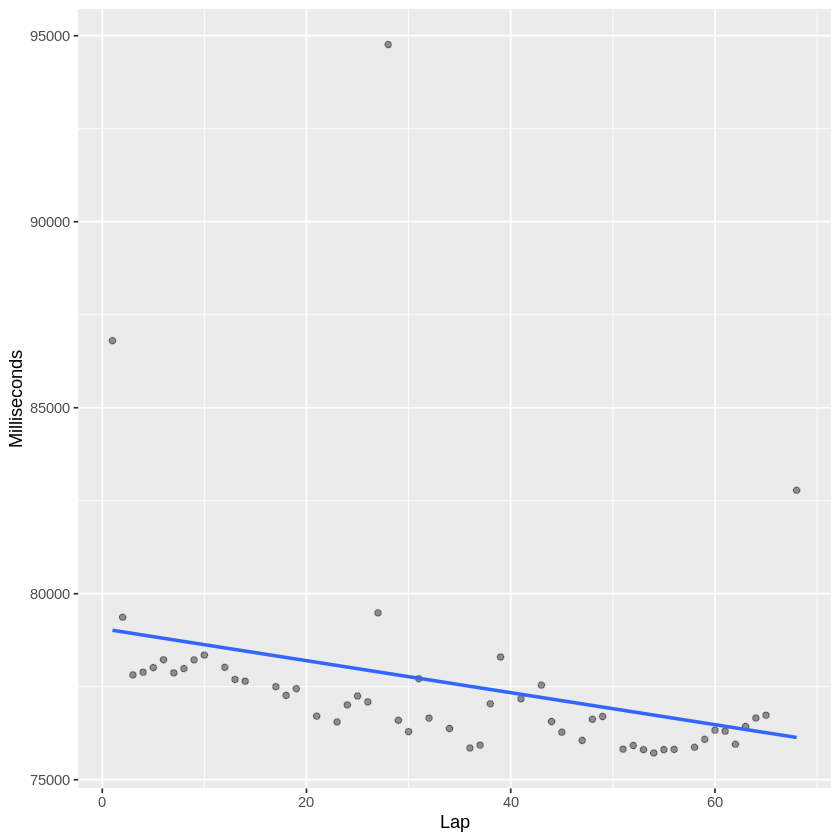

In [18]:
#15.  Netherlands

gr_netherlands <- rus_laps %>%
                filter(raceId %in% netherlands_race_ID) 

gr_netherlands_clean <- gr_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_netherlands_clean
gr_netherlands_clean_ID <- gr_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_netherlands_races <- rus_laps %>%
                    filter(raceId %in% gr_netherlands_clean_ID)

formulaone_split <- initial_split(gr_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1065,53
1023,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4829893,80.49822,1.341637


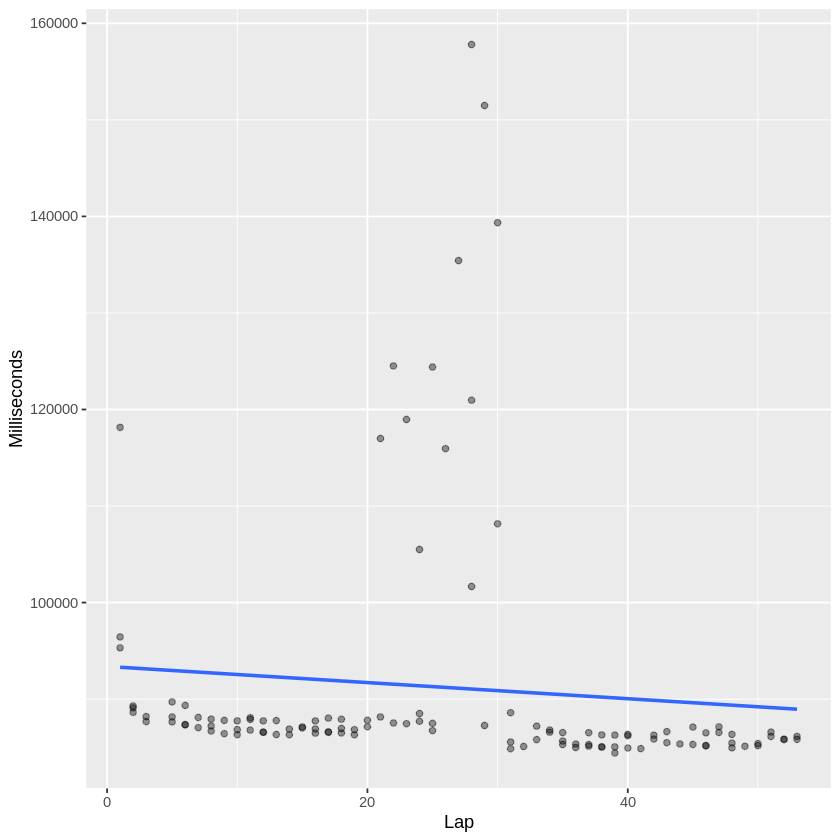

In [19]:
#16.  Italy, Monza

gr_monza <- rus_laps %>%
                filter(raceId %in% monza_race_ID) 

gr_monza_clean <- gr_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
gr_monza_clean
gr_monza_clean_ID <- gr_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_monza_races <- rus_laps %>%
                    filter(raceId %in% gr_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 1 breaks instead.”
Warning message:
“Too little data to stratify. Unstratified resampling will be used.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6671835,111.1973,1.853288


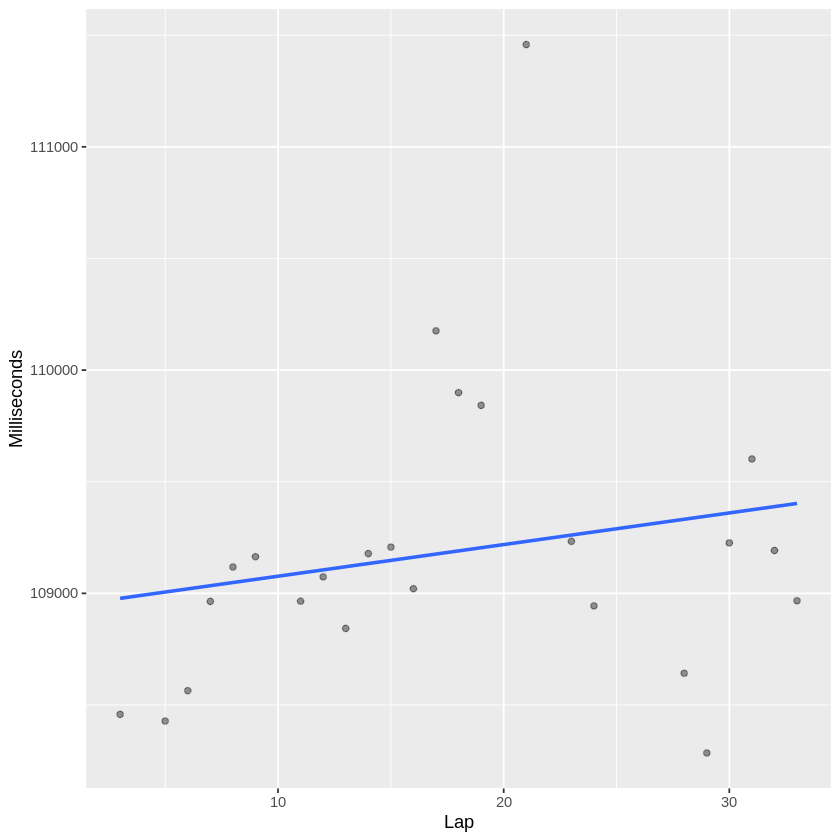

In [20]:
#17.  Singapore

gr_singapore <- rus_laps %>%
                filter(raceId %in% singapore_race_ID) 

gr_singapore_clean <- gr_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_singapore_clean_ID <- gr_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_singapore_races <- rus_laps %>%
                    filter(raceId %in% gr_singapore_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(gr_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5172866,86.21443,1.436907


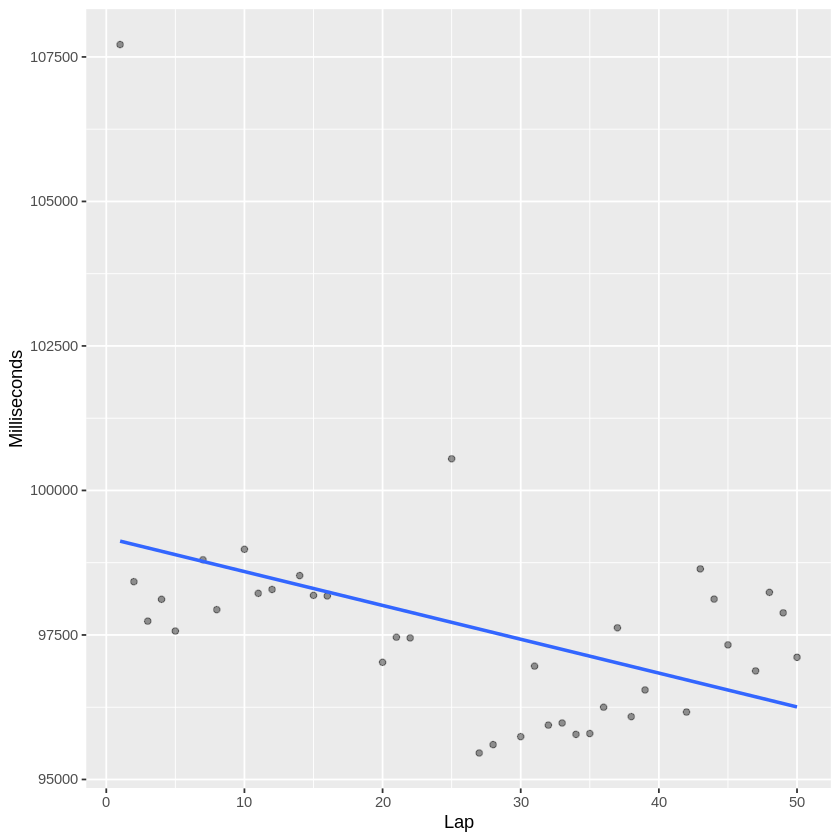

In [21]:
#18.  Japan

gr_japan <- rus_laps %>%
                filter(raceId %in% japan_race_ID) 

gr_japan_clean <- gr_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_japan_clean_ID <- gr_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_japan_races <- rus_laps %>%
                    filter(raceId %in% gr_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5849930,97.49883,1.62498


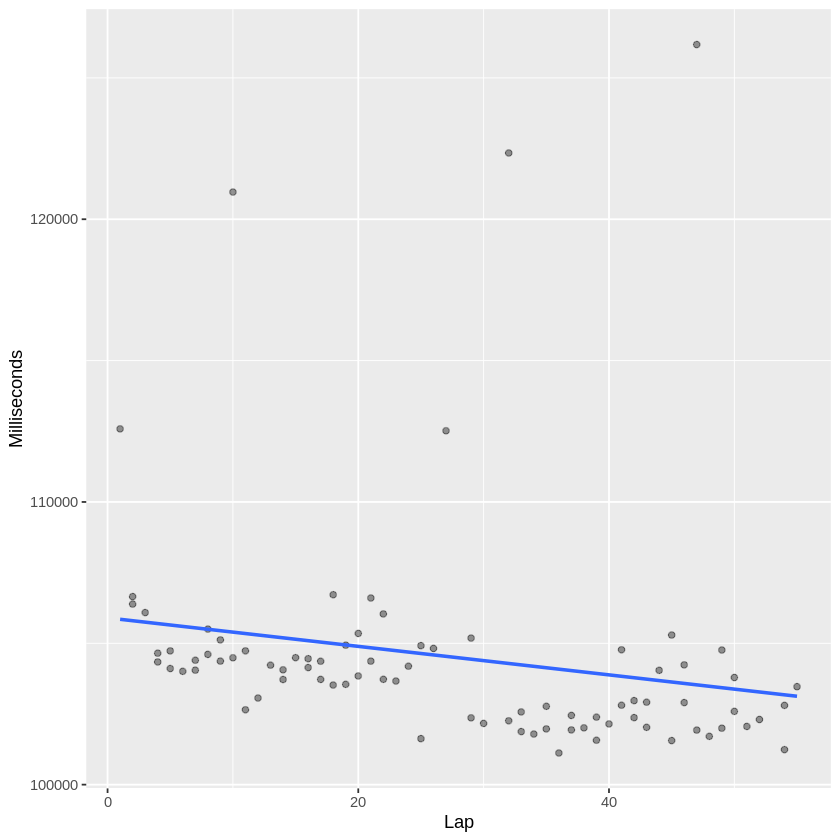

In [22]:
#19.  USA, Austin

gr_austin <- rus_laps %>%
                filter(raceId %in% austin_race_ID) 

gr_austin_clean <- gr_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_austin_clean_ID <- gr_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_austin_races <- rus_laps %>%
                    filter(raceId %in% gr_austin_clean_ID)

formulaone_split <- initial_split(gr_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6087736,101.4623,1.691038


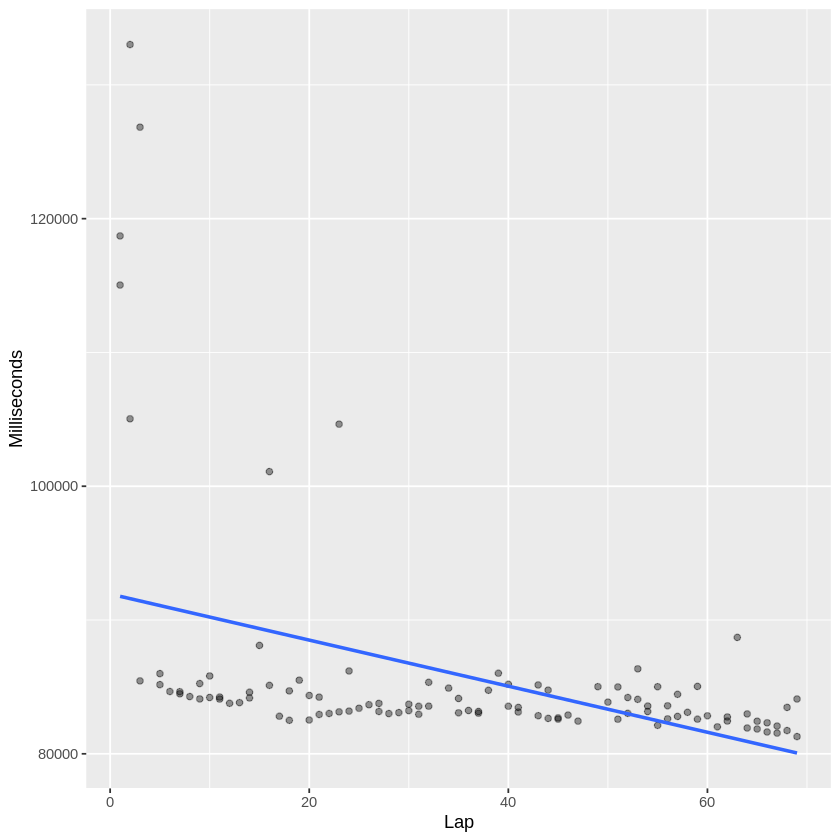

In [23]:
#20. Mexico

gr_mexico <- rus_laps %>%
                filter(raceId %in% mexico_race_ID) 

gr_mexico_clean <- gr_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_mexico_clean_ID <- gr_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_mexico_races <- rus_laps %>%
                    filter(raceId %in% gr_mexico_clean_ID)

formulaone_split <- initial_split(gr_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5627557,93.79262,1.56321


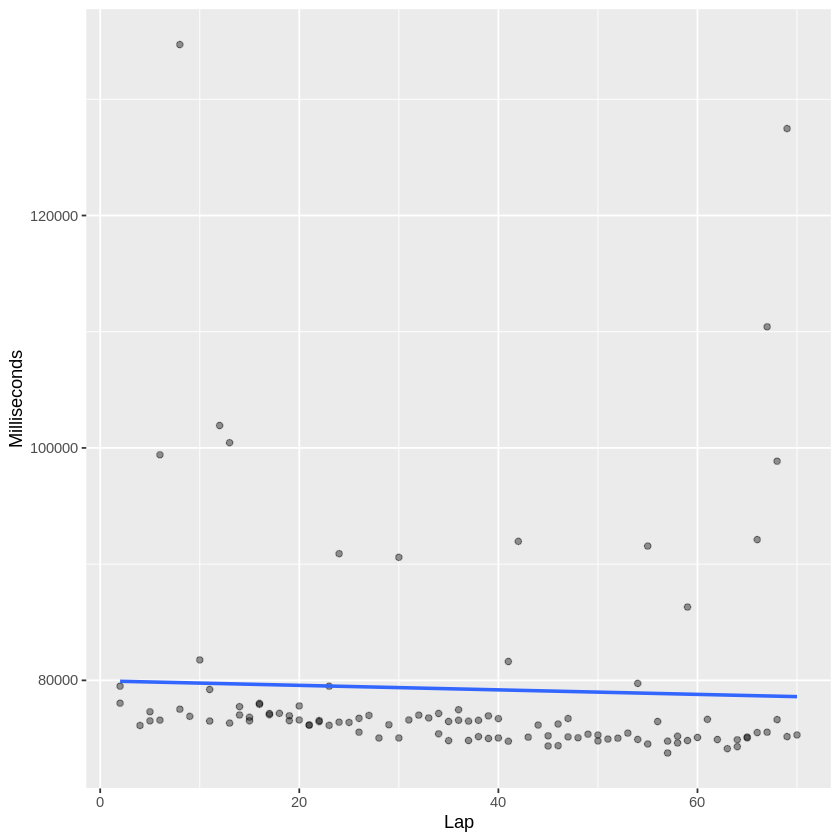

In [24]:
#21.  Brazil

gr_brazil <- rus_laps %>%
                filter(raceId %in% brazil_race_ID) 

gr_brazil_clean <- gr_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_brazil_clean_ID <- gr_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_brazil_races <- rus_laps %>%
                    filter(raceId %in% gr_brazil_clean_ID)

formulaone_split <- initial_split(gr_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1030,54
1047,54
1073,26


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6041875,100.6979,1.678299


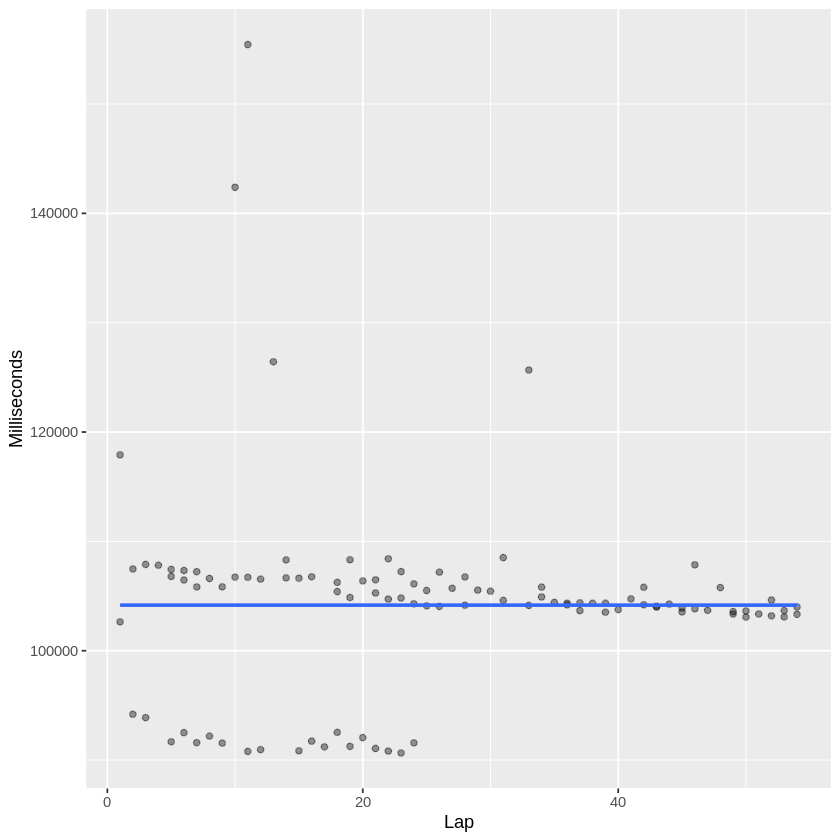

In [25]:
#22.  Abu Dhabi

gr_uae <- rus_laps %>%
                filter(raceId %in% uae_race_ID) 

gr_uae_clean <- gr_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_uae_clean
gr_uae_clean_ID <- gr_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_uae_races <- rus_laps %>%
                    filter(raceId %in% gr_uae_clean_ID)

formulaone_split <- initial_split(gr_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()